In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
import matplotlib.pyplot as plt
from flask import Flask
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
Measurement = Base.classes.measurement

In [5]:
Station = Base.classes.station

In [6]:
session = Session(engine)

In [7]:
conn = engine.connect()

In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
mQry = """
            SELECT
                date,
                station,
                prcp
            FROM
                Measurement
            """

In [10]:
mDf = pd.read_sql(mQry, conn)
mDf.head()

,date,station,prcp
0,2010-01-01,USC00519397,0.08
1,2010-01-02,USC00519397,0.00
2,2010-01-03,USC00519397,0.00
3,2010-01-04,USC00519397,0.00
4,2010-01-06,USC00519397,NaN


In [11]:
mDf["date"].max()

'2017-08-23'

In [12]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [13]:
mQry2 = """
            SELECT 
                station,
                date,
                prcp
            FROM
                measurement
            WHERE
                date > '2016-08-23'
            """

In [14]:
mDf2 =  pd.read_sql(mQry2, conn).sort_values('date')

In [15]:
mDf2["Date"] = pd.to_datetime(mDf2.date)
mDf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2222
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  2223 non-null   object        
 1   date     2223 non-null   object        
 2   prcp     2015 non-null   float64       
 3   Date     2223 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 86.8+ KB


In [16]:
sQry = """
            SELECT
                *
            FROM
                Station
            """

In [17]:
sDf = pd.read_sql(sQry, conn)
sDf.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


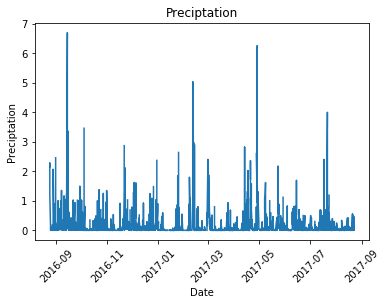

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(mDf2.Date, mDf2. prcp)
plt.xticks(rotation = 45)
plt.title("Preciptation")
plt.xlabel("Date")
plt.ylabel("Preciptation")
plt.figure()
plt.show()

In [19]:
mDf2.groupby('station').size().sort_values(ascending=False)

station
USC00519397    360
USC00519281    351
USC00516128    348
USC00513117    342
USC00519523    336
USC00514830    304
USC00517948    182
dtype: int64

In [20]:
stQry = """
            SELECT 
                *
            FROM
                Measurement
            WHERE 
                station = 'USC00519397' AND
                date > '2016-08-23'
            """

In [21]:
stationDf = pd.read_sql(stQry, conn)
len(stationDf)

360

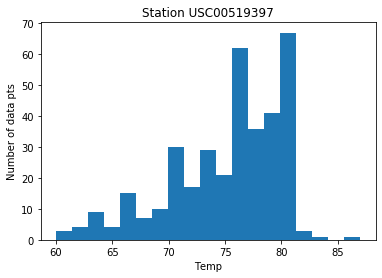

In [22]:
plt.hist(stationDf.tobs, bins = 19)
plt.title("Station USC00519397")
plt.xlabel("Temp")
plt.ylabel("Number of data pts")
plt.show()

In [30]:
qry43="""
        SELECT
            date,
            min(tobs) as min_temp,
            max(tobs) as max_temp,
            avg(tobs) as avg_temp
        FROM
            Measurement
        WHERE
            date > '2017-04-01'
        AND
            date < '2017-04-15'
        """

In [31]:
testDf = pd.read_sql(qry43, conn)
testDf.head()

,date,min_temp,max_temp,avg_temp
0,2017-04-11,67.0,82.0,74.428571
